<a href="https://colab.research.google.com/github/trinalfernando/Library-Management-System/blob/master/Data_Analysis_for_GOOSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas numpy matplotlib seaborn scikit-learn

Saving All data (Modified).xlsx to All data (Modified).xlsx
Dataset Shape: (27919, 38)
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27919 entries, 0 to 27918
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   pkt arrive time in UTC  27919 non-null  float64
 1   Label                   27919 non-null  int64  
 2   Heartbeat               27919 non-null  float64
 3   MACsrc                  27919 non-null  int64  
 4   MACdst                  27919 non-null  int64  
 5   APPID                   27919 non-null  int64  
 6   GOOSElength             27919 non-null  int64  
 7   gocbRef                 27919 non-null  int64  
 8   Timeallowedtolive       27919 non-null  int64  
 9   datset                  27919 non-null  object 
 10  goID                    27919 non-null  int64  
 11  t                       27919 non-null  int64  
 12  Dif_St                  27919 non-null  int

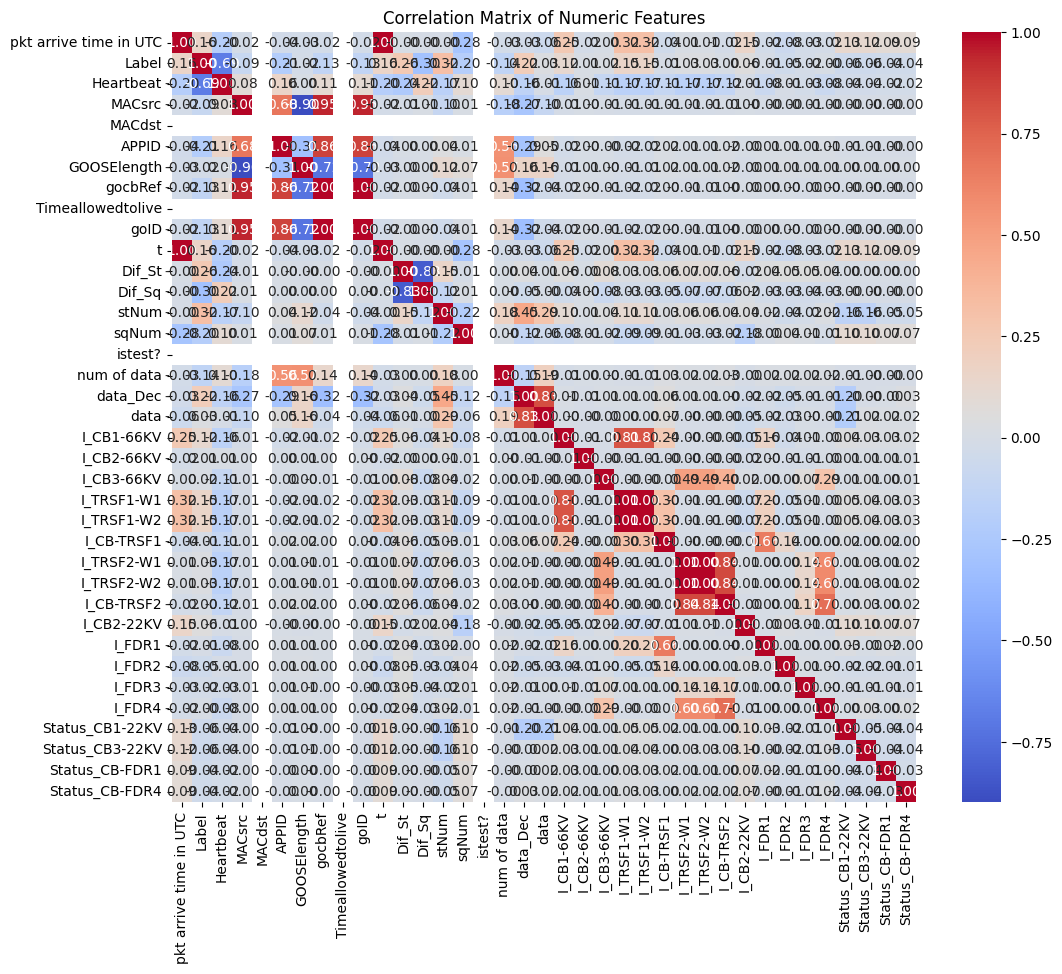

<ipython-input-6-9c51c45f68d9>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Label", y=feature, data=numeric_data, palette="viridis")


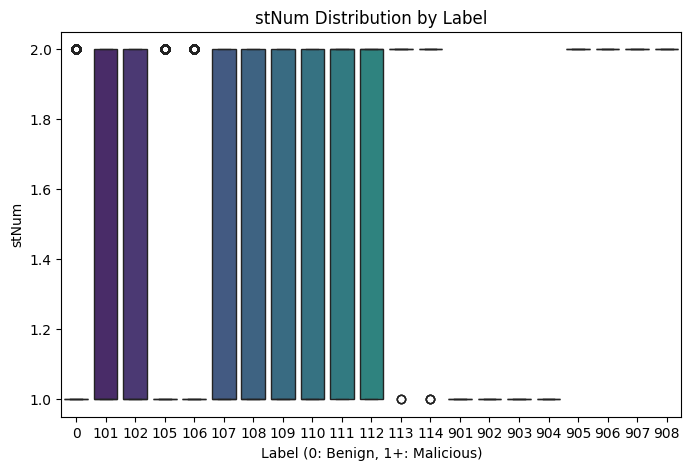

<ipython-input-6-9c51c45f68d9>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Label", y=feature, data=numeric_data, palette="viridis")


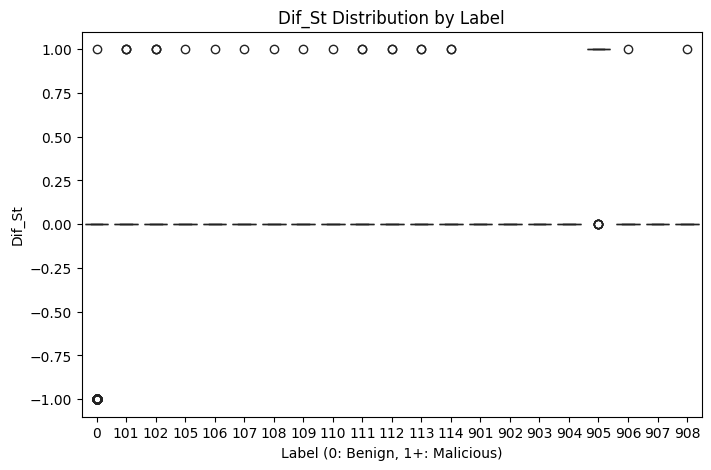

<ipython-input-6-9c51c45f68d9>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Label", y=feature, data=numeric_data, palette="viridis")


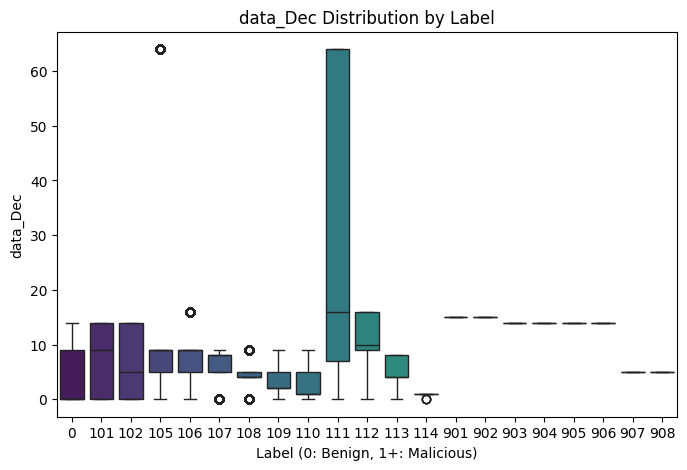

<ipython-input-6-9c51c45f68d9>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Label", y=feature, data=numeric_data, palette="viridis")


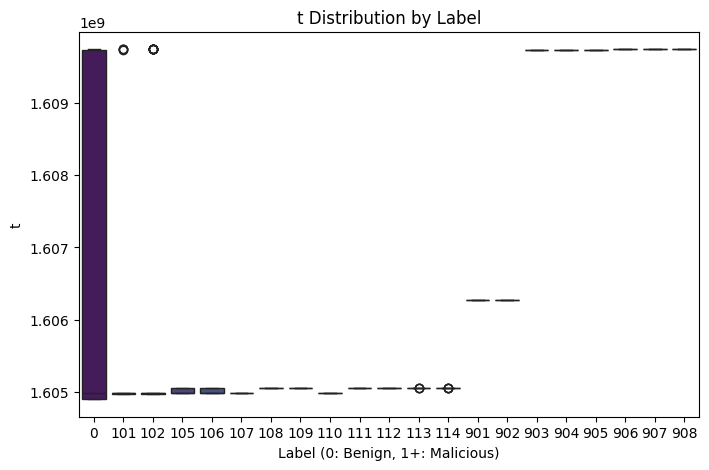

<ipython-input-6-9c51c45f68d9>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Label", y=feature, data=numeric_data, palette="viridis")


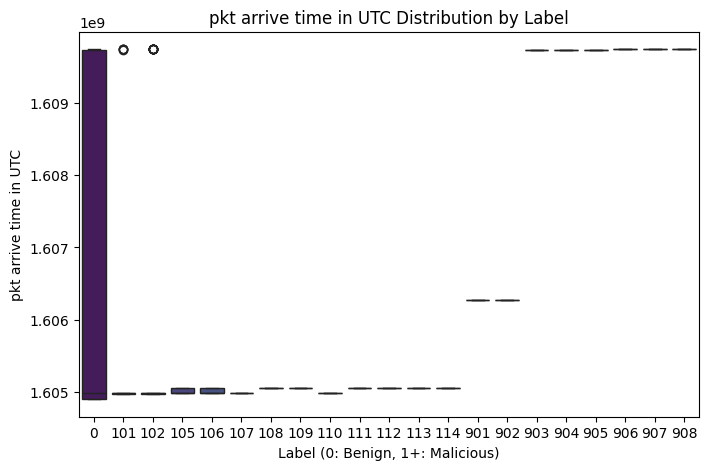

<ipython-input-6-9c51c45f68d9>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Label", y=feature, data=numeric_data, palette="viridis")


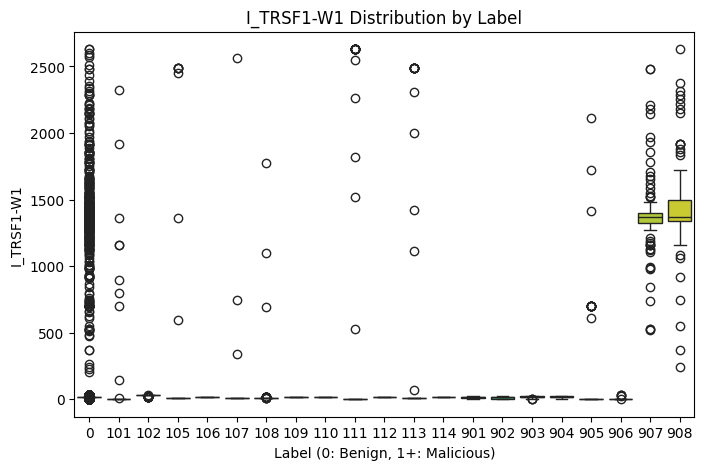

<ipython-input-6-9c51c45f68d9>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Label", y=feature, data=numeric_data, palette="viridis")


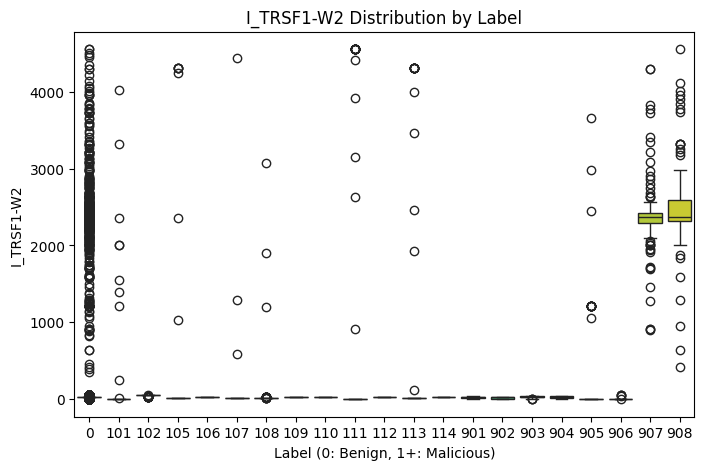

<ipython-input-6-9c51c45f68d9>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Label", y=feature, data=numeric_data, palette="viridis")


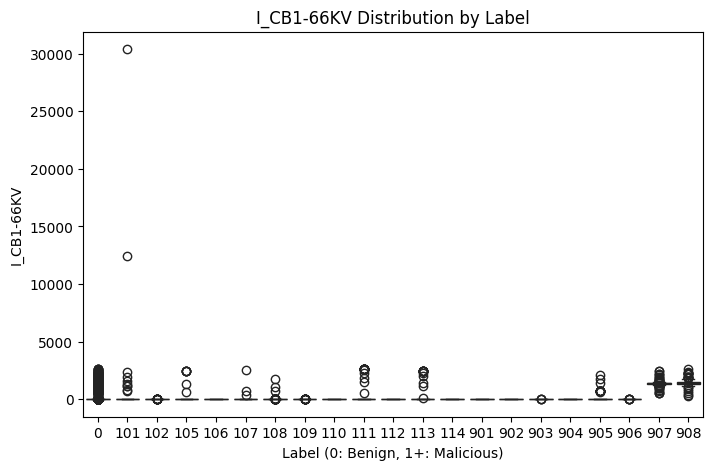

<ipython-input-6-9c51c45f68d9>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Label", y=feature, data=numeric_data, palette="viridis")


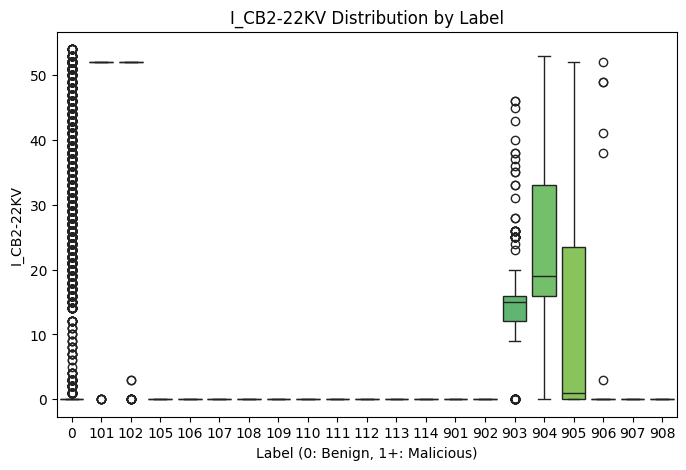

<ipython-input-6-9c51c45f68d9>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Label", y=feature, data=numeric_data, palette="viridis")


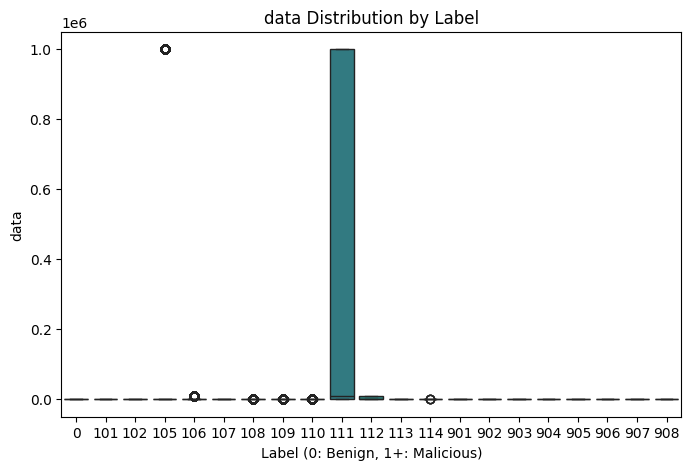

<ipython-input-6-9c51c45f68d9>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importances, palette="Spectral")


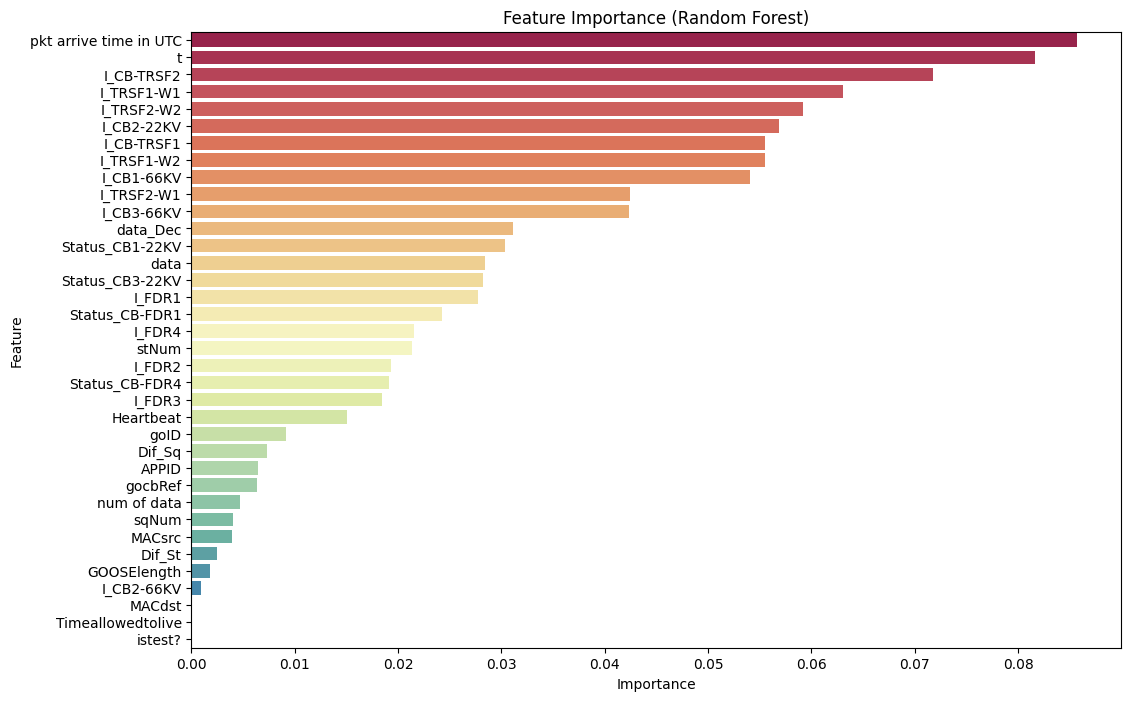

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


from IPython.display import display
from google.colab import files
uploaded = files.upload()

uploaded_file_name = list(uploaded.keys())[0]
data = pd.read_excel(uploaded_file_name)

print("Dataset Shape:", data.shape)
print("Dataset Info:")
data.info()
print("\nFirst few rows:")
print(data.head())

# Ensure numeric features
numeric_data = data.select_dtypes(include=[np.number])

# Correlation Analysis
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Numeric Features")
plt.show()

# Analyze features with the highest correlation to Label
label_correlation = correlation_matrix["Label"].sort_values(ascending=False)
top_features = label_correlation.index[1:11]  # Exclude 'Label'

for feature in top_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x="Label", y=feature, data=numeric_data, palette="viridis")
    plt.title(f"{feature} Distribution by Label")
    plt.xlabel("Label (0: Benign, 1+: Malicious)")
    plt.ylabel(feature)
    plt.show()

# Random Forest Feature Importance
X = numeric_data.drop(columns=["Label"])
y = numeric_data["Label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

feature_importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x="Importance", y="Feature", data=feature_importances, palette="Spectral")
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from google.colab import files

print("Upload your Excel file:")
uploaded = files.upload()

file_name = list(uploaded.keys())[0]  # Get the uploaded file name
sheet_modified = pd.read_excel(file_name, sheet_name='Modified')

features = sheet_modified.select_dtypes(include=['float64', 'int64']).drop(columns=['Label'])
target = sheet_modified['Label']

# Train-test split for validation
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Feature importance analysis
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({'Attribute': features.columns, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)
print("\nFeature Importance Analysis:")
print(importance_df)

# Correlation analysis with Label (Excluded non-numeric columns to avoid conversion errors)
numeric_columns = sheet_modified.select_dtypes(include=['float64', 'int64'])

# Calculate correlation with Label
correlation_df = numeric_columns.corr()['Label'].sort_values(ascending=False)

# Display correlation values
print("\nCorrelation Analysis with Label:")
print(correlation_df)


Please upload your Excel file:


Saving All data (Modified).xlsx to All data (Modified) (1).xlsx

Feature Importance Analysis:
                 Attribute  Importance
9                        t    0.092915
0   pkt arrive time in UTC    0.084050
18              I_CB1-66KV    0.066282
22              I_TRSF1-W2    0.062993
21              I_TRSF1-W1    0.061606
26              I_CB-TRSF2    0.061534
25              I_TRSF2-W2    0.057390
20              I_CB3-66KV    0.052884
27              I_CB2-22KV    0.050052
23              I_CB-TRSF1    0.047570
24              I_TRSF2-W1    0.044150
33         Status_CB3-22KV    0.032099
32         Status_CB1-22KV    0.030627
16                data_Dec    0.029132
17                    data    0.028502
28                  I_FDR1    0.023674
34          Status_CB-FDR1    0.020746
29                  I_FDR2    0.019523
35          Status_CB-FDR4    0.017773
1                Heartbeat    0.017678
31                  I_FDR4    0.017379
30                  I_FDR3    0.017344
12       

Dataset collected scenarios
- Stable operation of the electrical system
- Electrical system failure events
- Spoofing attacks during stable operations
- Spoofing attacks during failure events

Label Values
- Label 0 - Stable/Normal Operations
- Label 101-114 - Specific fault events
- Label 901-908 - Spoof attack scenarios

Identification of the most inflencial attributes to the outcome
- Correlation Analysis
- Feature importance using ML


Feature Importance (ML-Based)
- Measures predictive power
- Top Attributes: pkt arrive time, Heartbeat, Status_CB1-22KV, stNum, Dif_St, Goose Length

Correlation Analysis
- Measures linear relationships
- Top Attributes: stNum, Dif_St, pkt arrive time, Heartbeat
